## Step 1: Import Libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Step 2: Load the Datasets

In [16]:
import pandas as pd
df1 = pd.read_csv("Unemployment in India.csv")
df1.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [13]:
df2 = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


## Step 3: Clean and Prepare the Data

In [15]:
# Clean column names
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# Convert Date to datetime
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce', dayfirst=True)
df2['Date'] = pd.to_datetime(df2['Date'], errors='coerce', dayfirst=True)

# Add source column for tracking
df1['Source'] = 'Dataset 1'
df2['Source'] = 'Dataset 2'

# Align and merge common columns
common_cols = [
    'Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
    'Estimated Employed', 'Estimated Labour Participation Rate (%)'
]

df1_clean = df1[common_cols + ['Source']]
df2_clean = df2[common_cols + ['Source']]

# Combine into one dataframe
df_combined = pd.concat([df1_clean, df2_clean], ignore_index=True)

# Drop missing values in critical columns
df_combined.dropna(subset=['Region', 'Date', 'Estimated Unemployment Rate (%)'], inplace=True)

# Preview cleaned data
df_combined.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Source
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Dataset 1
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Dataset 1
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Dataset 1
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Dataset 1
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Dataset 1


## Step 4: National Unemployment Trend Over Time

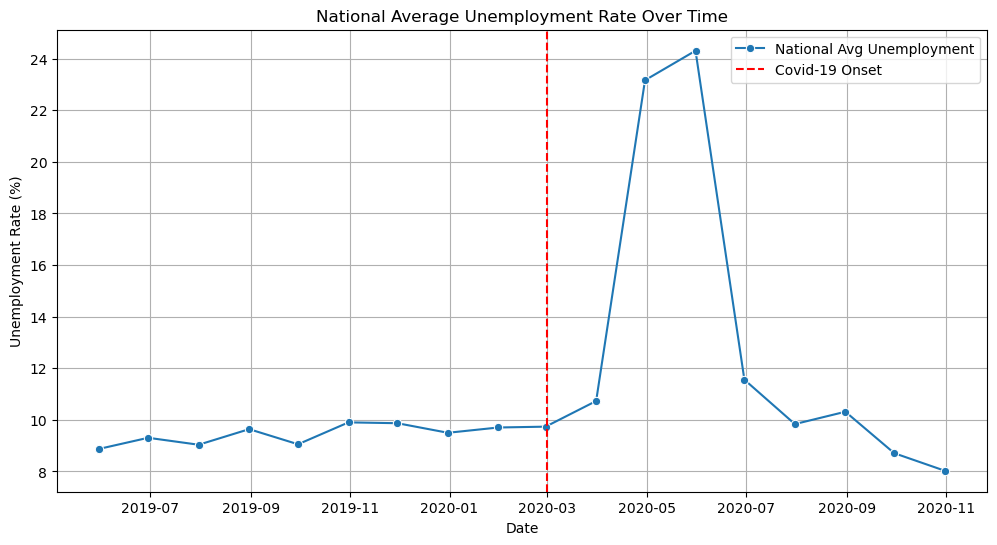

In [18]:
# Group by date and get national average unemployment rate
national_trend = df_combined.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

# Plot national trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=national_trend.index, y=national_trend.values, marker='o', label='National Avg Unemployment')
plt.axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', label='Covid-19 Onset')
plt.title('National Average Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.legend()
plt.show()


## Step 5: Seasonal Trend (Month-Wise Average)

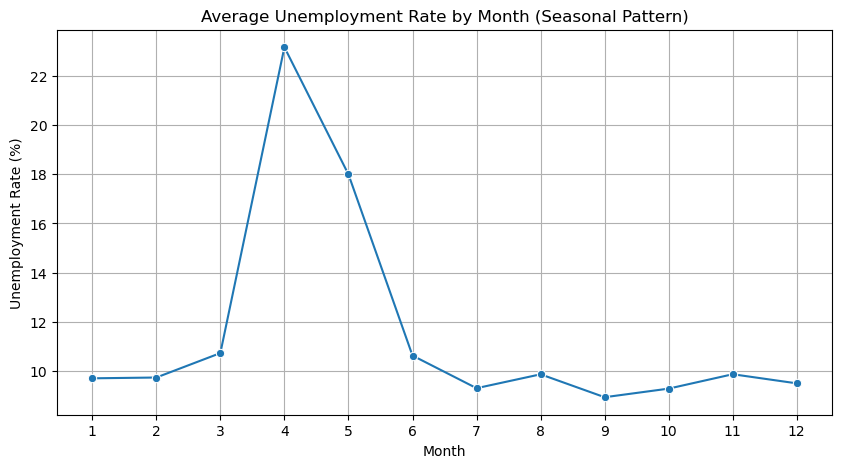

In [19]:
# Add Month column
df_combined['Month'] = df_combined['Date'].dt.month

# Group by month
monthly_avg = df_combined.groupby('Month')['Estimated Unemployment Rate (%)'].mean()

# Plot seasonal trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o')
plt.title('Average Unemployment Rate by Month (Seasonal Pattern)')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


##  Step 6: Regional Comparison


C:\Users\Aditya\AppData\Local\Temp\ipykernel_20060\61272255.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.values, y=region_avg.index, palette='coolwarm')


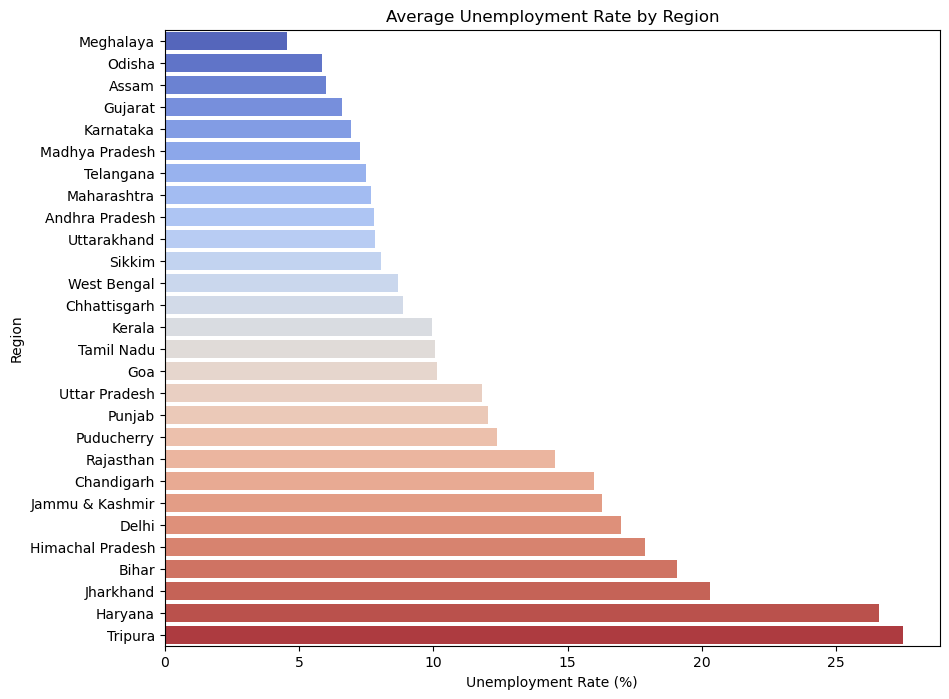

In [20]:
# Group by region and average the unemployment rate
region_avg = df_combined.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values()

# Plot region-wise unemployment rate
plt.figure(figsize=(10, 8))
sns.barplot(x=region_avg.values, y=region_avg.index, palette='coolwarm')
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Region')
plt.show()


## Step 7 : Covid-19 Impact Before vs After March 2020


In [21]:
# Split the data into before and after March 2020
before_covid = df_combined[df_combined['Date'] < '2020-03-01']
after_covid = df_combined[df_combined['Date'] >= '2020-03-01']

# Average unemployment rate
before_avg = before_covid['Estimated Unemployment Rate (%)'].mean()
after_avg = after_covid['Estimated Unemployment Rate (%)'].mean()

print(f"📉 Average Unemployment Rate Before Covid: {before_avg:.2f}%")
print(f"📈 Average Unemployment Rate After Covid: {after_avg:.2f}%")


📉 Average Unemployment Rate Before Covid: 9.48%
📈 Average Unemployment Rate After Covid: 15.31%


## Key Insights and Policy Recommendations


- Post-COVID Spike
Unemployment rose sharply after March 2020.
Policy: Implement emergency job schemes and reskilling programs.

- Regional Gaps
Unemployment was higher in states like Haryana and Rajasthan; lower in states like Chhattisgarh and Gujarat.
Policy: Design state-specific job creation plans and provide industrial incentives.

- Seasonal Unemployment
Higher unemployment during monsoon months due to agricultural dependency.
Policy: Offer temporary rural employment and public works projects in off-seasons.

- Youth and Informal Workers Most Affected
Younger individuals and informal/gig workers were disproportionately impacted.
Policy: Launch skill training programs and legal protections for informal workers.

- Decline in Labour Participation
Many stopped actively seeking jobs after the pandemic.
Policy: Encourage participation through support for women and job placement services.

